In [2]:
import mxnet as mx
import gluoncv as gcv
import matplotlib.pyplot as plt

In [5]:
image_url = 'https://raw.githubusercontent.com/dmlc/web-data/master/gluoncv/classification/mt_baker.jpg'

In [7]:
image_filepath='mt_baker.jpg'
gcv.utils.download(url=image_url,path=image_filepath)

305KB [00:00, 3785.76KB/s]             


'mt_baker.jpg'

In [8]:
image = mx.image.imread('mt_baker.jpg')

In [9]:
print('type: ',type(image))

type:  <class 'mxnet.ndarray.ndarray.NDArray'>


In [11]:
# HWC Layout Height, width Channel
print('shape :', image.shape)

shape : (1458, 3000, 3)


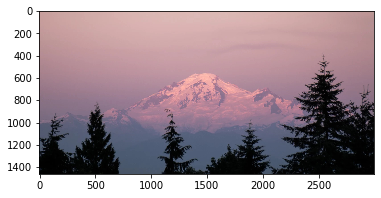

In [13]:
# Visualize image
plt.imshow(image.asnumpy())

In [14]:
# Transform and Batch image
# crop center of image, datatype to float32 
image = gcv.data.transforms.presets.imagenet.transform_eval(image)

In [15]:
print('shape: ',image.shape)
print('data type: ',image.dtype)
print('min value: ',image.min().asscalar())
print('max value: ',image.max().asscalar())

shape:  (1, 3, 224, 224)
data type:  <class 'numpy.float32'>
min value:  -2.117904
max value:  2.2489083


In [31]:
# Get model from, specify network, pretrained to true
# network = gcv.model_zoo.resnet50_v1b_gn(pretrained=True)
network = gcv.model_zoo.resnet50_v2(pretrained=True)

92863KB [00:02, 34082.28KB/s]                           


In [32]:
# PREDICT
prediction = network(image)

In [33]:
print(prediction.shape)

(1, 1000)


In [34]:
prediction = prediction[0]

In [35]:
print(prediction.shape)

(1000,)


In [36]:
probability = mx.nd.softmax(prediction)

In [37]:
rounded_probability = mx.nd.round(probability*100)/100
print('Skipping 950 values...')
print(rounded_probability[950:])

Skipping 950 values...

[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.44 0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.55 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.  ]
<NDArray 50 @cpu(0)>


In [38]:
#TOP K using SOFTMAX
k=5
topk_indices = mx.nd.topk(probability,k=k)
topk_indices


[980. 970. 979. 672. 975.]
<NDArray 5 @cpu(0)>

In [39]:
# FINAL PREDICTION

for i in range(k):
    class_index = topk_indices[i].astype('int').asscalar()
    class_label = network.classes[class_index]
    class_probability = probability[class_index]
    print('#{} {} ({:0.3}%)'.format(i+1, class_label,class_probability.asscalar()*100))

#1 volcano (55.2%)
#2 alp (44.4%)
#3 valley (0.172%)
#4 mountain tent (0.0987%)
#5 lakeside (0.033%)


In [41]:
def get_prediction(net,img,k=5):
    ### Prediction pipeline
    pred = net(img)
    pred = pred[0]
    prob = mx.nd.softmax(pred)
    topk_indices = mx.nd.topk(prob,k=k)
    topk_indices
    for i in range(k):
        class_index = topk_indices[i].astype('int').asscalar()
        class_label = network.classes[class_index]
        class_probability = prob[class_index]
        print('#{} {} ({:0.3}%)'.format(i+1, class_label,class_probability.asscalar()*100))
    
    

In [42]:
a = get_prediction(gcv.model_zoo.resnet50_v1b_gn(pretrained=True),image,5)

#1 volcano (48.1%)
#2 alp (22.6%)
#3 lakeside (1.56%)
#4 mountain tent (0.961%)
#5 balloon (0.615%)


In [44]:
net = gcv.model_zoo.resnet152_v1(pretrained=True)
b = get_prediction(net,image,5)

100%|██████████| 218951/218951 [00:07<00:00, 27926.19KB/s]


#1 volcano (97.1%)
#2 alp (0.576%)
#3 mountain tent (0.0636%)
#4 valley (0.033%)
#5 lakeside (0.0255%)
